# Joseph Mattouk

# Part 1


## Importing Libraries Necessary


##### Importing libarries at the top of the code and not in between cells is crutial this way if there are any issues between any of the packages it will directly show instead of us running through the cells and the finding out there is an issue and wasting time

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'pandas'

## Reading the from the data file


### Also checking for any useless columns

In [ ]:
# fle path
file_path = "restats.csv"

# Read the csv file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was loaded correctly
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


#### Would like to initially check how many rows and columns i have to see the differnece after the eda and make sure i still have enough data

In [ ]:
# Checking how many rows and coloumns are there in the dataset
df.shape

(17857, 26)

## EDA

### Using the head function, I first saw that we have a column called Unnamed: 0 which is useless so we will have to drop it to clean up the data


In [ ]:
# Remove the column that is likely an index column saved by pandas, often named 'Unnamed: 0'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,0.3,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,-4.3,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,-4.1,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,-3.7,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,-5.3,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


#### Checking if there are any missing values as we could replace missing values with the mean of the column instead of dropping them all and losing a lor of data

In [ ]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

#### I can see that there are alot of missing values, and we cannot drop all of them because we will not have enough data to train and test with. So I replaced these missing values by the mean

In [ ]:

# If there are missing values, replace them with the mean of their respective column
if missing_values.any():
    df = df.fillna(df.mean())
else:
    df = df

# Check again for missing values after replacement to verify
missing_values_after = df.isnull().sum()

missing_values, missing_values_after

/var/folders/cc/kq0y1c554yb92pgx1ptwtpq00000gn/T/ipykernel_38374/2110697158.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


(inm_floor                                          3790
 inm_size                                           1767
 inm_price                                             0
 inm_longitude                                         0
 inm_latitude                                          0
 inm_barrio                                         1794
 inm_distrito                                       1747
 his_price                                             0
 his_quarterly_variation                               0
 his_annual_variation                                  0
 his_monthly_variation                                 0
 dem_Indice_de_reemplazo_de_la_poblacion_activa        0
 dem_Indice_de_juventud                                0
 dem_Indice_de_estructura_de_la_poblacion_activa       0
 dem_Indice_de_dependencia                             0
 dem_TasaDeParo                                        0
 dem_TamanoMedioDelHogar                               0
 dem_PropSinEstudiosUniversitar

#### For the categorical values we cannot change by the mean because they are string so we just drop these rows

In [ ]:
# Drop rows where any of the remaining missing values exist in the categorical columns
df_dropped_categorical_missing = df.dropna(subset=['inm_barrio', 'inm_distrito'])

# Check again for missing values after dropping to verify
missing_values_after_dropping = df_dropped_categorical_missing.isnull().sum()

missing_values_after_dropping

inm_floor                                          0
inm_size                                           0
inm_price                                          0
inm_longitude                                      0
inm_latitude                                       0
inm_barrio                                         0
inm_distrito                                       0
his_price                                          0
his_quarterly_variation                            0
his_annual_variation                               0
his_monthly_variation                              0
dem_Indice_de_reemplazo_de_la_poblacion_activa     0
dem_Indice_de_juventud                             0
dem_Indice_de_estructura_de_la_poblacion_activa    0
dem_Indice_de_dependencia                          0
dem_TasaDeParo                                     0
dem_TamanoMedioDelHogar                            0
dem_PropSinEstudiosUniversitarios                  0
dem_PropSinEstudios                           

#### Now I will check for duplicates to further clean the data

In [ ]:
# Check for duplicate rows based on all columns
duplicates_before = df_dropped_categorical_missing.duplicated().sum()
print(duplicates_before)


6


#### I have 6 duplicates which i can remove because they are useless for the dataset

In [ ]:
# Remove duplicate rows
df_no_duplicates = df_dropped_categorical_missing.drop_duplicates()

# Check again for duplicates to verify
duplicates_after = df_no_duplicates.duplicated().sum()

duplicates_after

0

#### Using graphs to visualize the data and see what is important and what data can be comibined

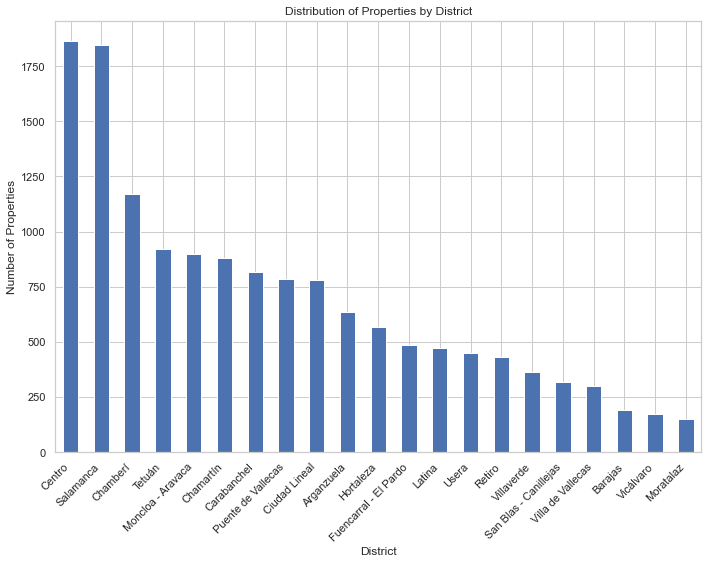

In [ ]:

# We'll visualize the distribution of properties across districts as it's more aggregated than barrios
district_counts = df_no_duplicates['inm_distrito'].value_counts()
# Plot
plt.figure(figsize=(10, 8))
district_counts.plot(kind='bar')
plt.title('Distribution of Properties by District')
plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Here i see that there are alot of apartaments in centro and in salamnca so it is essential to keep that data into the model as it has the most information

##### Using heat map to check for corrolation

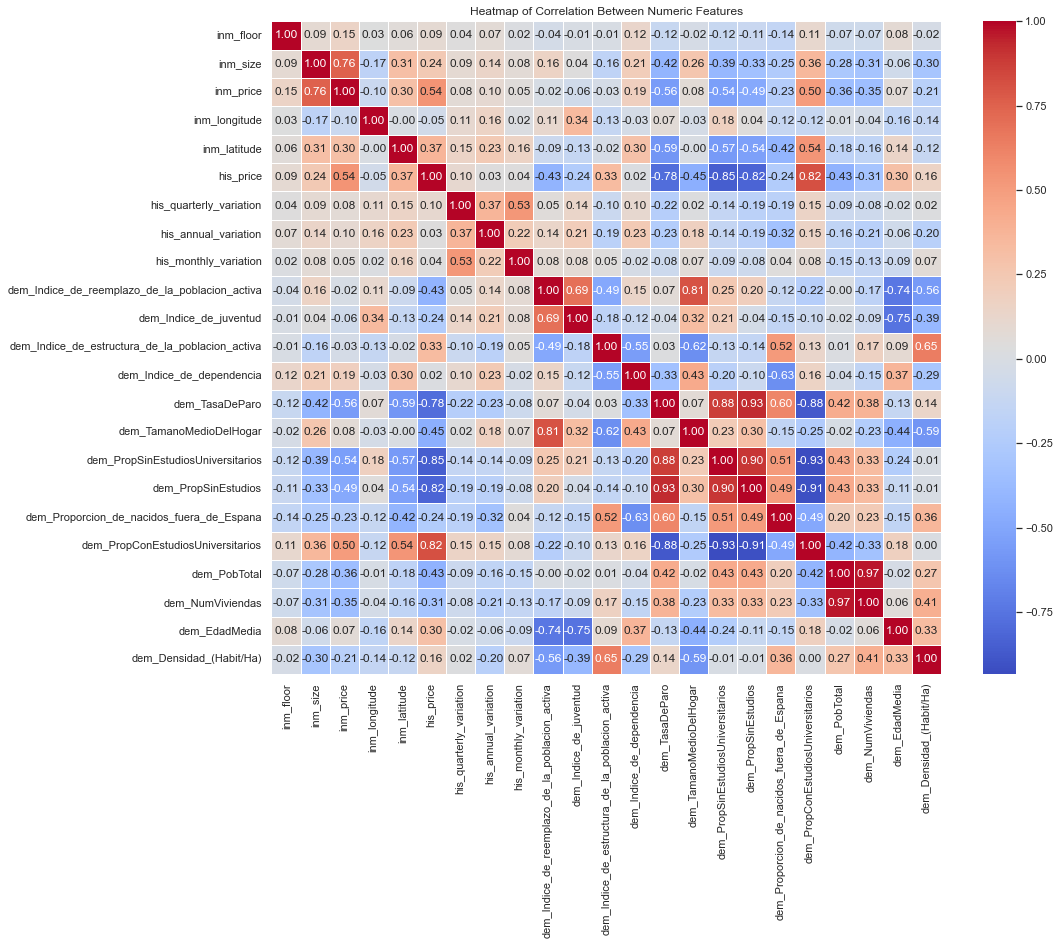

In [ ]:
# Calculate correlation matrix for numeric columns
corr_matrix = df_no_duplicates.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Between Numeric Features')
plt.show()

#### Here i can see that the inm_price is corrolated with the inm_size

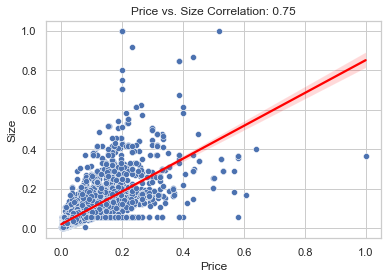

In [ ]:

# Calculate Pearson's correlation coefficient
correlation = df["inm_price"].corr(df["inm_size"])

# Visualize the relationship with a scatter plot and a regression line
sns.scatterplot(x="inm_price", y="inm_size", data=df)
sns.regplot(x="inm_price", y="inm_size", data=df, scatter=False, color="red")

plt.xlabel('Price')
plt.ylabel('Size')
plt.title(f'Price vs. Size Correlation: {correlation:.2f}')
plt.show()

#### We can see that there is a very high corrolation based on the pearson coef

##### Removing outliers for certain columns 

##### I checked the heat map and saw some of the values that have a very low corrolation and decided to remove the outlier to possibly have a chnace to get a higher accuracy

In [ ]:
# we will move the outlier that have a value less than 0.2
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
# Apply the outlier removal process to 'dem_TamanoMedioDelHogar', 'inm_floor', and 'dem_Indice_de_dependencia'

for column in ['dem_TamanoMedioDelHogar', 'inm_floor', 'dem_Indice_de_dependencia']:
    df = remove_outliers(df, column)

# Compare the size of the dataframe before and after this round of outlier removal
df_size_before_second_round = df  
df_size_after_second_round = df.shape[0]

df_size_before_second_round, df_size_after_second_round


(       inm_floor    inm_size  inm_price  inm_longitude  inm_latitude  \
 0       3.000000  141.000000     990000      -3.656875     40.464347   
 1       2.000000  159.000000     940000      -3.703523     40.419427   
 2       2.696453  149.013753     549000      -3.669626     40.435362   
 3       2.000000  232.000000     750000      -3.720619     40.424164   
 4       4.000000  183.000000    1550000      -3.705909     40.413214   
 ...          ...         ...        ...            ...           ...   
 17852   0.000000   28.000000      94000      -3.705236     40.448713   
 17853   1.000000  247.000000    1250000      -3.797123     40.458962   
 17854   3.000000   73.000000     137260      -3.731940     40.377805   
 17855   5.000000   72.000000     304880      -3.704166     40.455556   
 17856   5.000000  422.000000    2490000      -3.678877     40.437514   
 
           inm_barrio       inm_distrito  his_price  his_quarterly_variation  \
 0           Canillas          Hortaleza  

##### After the EDA I wanted to check how much data i have removed to make sure i am not over fitting the model

In [ ]:
df.shape

(15957, 25)

### Binary encoding for categorical values because i cant use strings to analyse the data, i could use one hot encoding but i would prefer to use binary emcoder because one hot encoding will make the dataset so much bigger

In [ ]:
# Instantiate the binary encoder
binary_encoder = BinaryEncoder(cols=['inm_barrio', 'inm_distrito'])

# Fit and transform the data
df = binary_encoder.fit_transform(df)

# Display the new dataframe to see the binary encoded columns
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio_0,inm_barrio_1,inm_barrio_2,inm_barrio_3,inm_barrio_4,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,3.000000,141.000000,990000,-3.656875,40.464347,0,0,0,0,0,...,8.724674,2.527886,0.488949,0.175632,15.456193,0.439830,40838,16155,44.315032,161.894356
1,2.000000,159.000000,940000,-3.703523,40.419427,0,0,0,0,0,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2.696453,149.013753,549000,-3.669626,40.435362,0,0,0,0,0,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,2.000000,232.000000,750000,-3.720619,40.424164,0,0,0,0,1,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4.000000,183.000000,1550000,-3.705909,40.413214,0,0,0,0,1,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


#### Feature engineering

#### Combining 'his_price' with 'his_quarterly_variation' into a new feature is an effective feature engineering strategy because it creates a more informative variable that reflects the adjusted historical price based on recent trends. This adjustment allows models to better capture and predict based on the most recent market dynamics, potentially improving prediction accuracy by incorporating both long-term value and recent fluctuations into a single feature.


In [ ]:
# Create a new column by combining 'his_price' and 'his_quarterly_variation'
# Assuming the new feature could represent the impact of recent price changes on the historical price,
# let's create a feature that multiplies historical price by (1 + quarterly variation),
# to account for the increase/decrease in price due to the quarterly variation.

df['price_quarterly_interaction'] = df['his_price'] * (1 + df['his_quarterly_variation'] / 100)

# Display the dataframe to see the new column
df[['his_price', 'his_quarterly_variation', 'price_quarterly_interaction']].head()



,his_price,his_quarterly_variation,price_quarterly_interaction
0,3250,2.2,3321.500
1,5106,1.4,5177.484
2,4100,0.6,4124.600
3,4773,0.5,4796.865
4,4739,-5.5,4478.355


#### Creating a new feature by multiplying 'inm_size' with 'dem_Densidad_(Habit/Ha)' combines property size and local population density, offering a compound metric that reflects both a property's spatial attributes and its surrounding area's density. This can enrich models by providing insights into how space and density influence prices, demand, or suitability, making it valuable for predictions in real estate or urban planning contexts.







In [ ]:
# Combining the size of the property with the population density of the area could provide a unique 
# feature that captures both the space offered by the property and the demand 
# or congestion level of its location. This feature could be particularly useful for models 
# predicting price, demand, or suitability for certain types of residents.

df['inm_size_density_interaction'] = df['inm_size'] *  df['dem_Densidad_(Habit/Ha)']

# Display the updated dataframe to see the recalculated interaction feature along with the columns it's derived from
df[['inm_size', 'dem_Densidad_(Habit/Ha)', 'inm_size_density_interaction']].head()

,inm_size,dem_Densidad_(Habit/Ha),inm_size_density_interaction
0,141.000000,161.894356,22827.104233
1,159.000000,352.500616,56047.597893
2,149.013753,263.952286,39332.520708
3,232.000000,322.402577,74797.397850
4,183.000000,171.165183,31323.228418


### Normalizing the data

##### Normalizing data is essential to ensure all features contribute equally to the model's predictionsenhance model performance, and prevent numerical instability.



In [ ]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to normalize, excluding categorical or encoded columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude any non-original numeric columns that were added as part of feature engineering
exclude_columns = ['inm_barrio_encoded', 'inm_distrito_encoded', 'size_household_interaction', 'price_quarterly_interaction']
columns_to_normalize = [col for col in numeric_columns if col not in exclude_columns]

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the dataframe to see the normalized columns
df[columns_to_normalize].head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio_0,inm_barrio_1,inm_barrio_2,inm_barrio_3,inm_barrio_4,...,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),inm_size_density_interaction
0,0.571429,0.055602,0.065003,0.619205,0.758736,0.0,0.0,0.0,0.0,0.0,...,0.447339,0.563478,0.436070,0.149928,0.612332,0.591203,0.588623,0.694894,0.348268,0.083696
1,0.428571,0.063127,0.061666,0.459465,0.508512,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.270153,0.148446,0.587194,0.764108,0.477084,0.617817,0.655131,0.764126,0.206084
2,0.528065,0.058952,0.035571,0.575542,0.597277,0.0,0.0,0.0,0.0,0.0,...,0.319351,0.210598,0.106279,0.222643,0.822008,0.613780,0.653944,0.830054,0.570934,0.144504
3,0.428571,0.093645,0.048986,0.400922,0.534897,0.0,0.0,0.0,0.0,1.0,...,0.285531,0.147160,0.093913,0.294604,0.866112,0.338742,0.370436,0.861008,0.698459,0.275160
4,0.714286,0.073161,0.102376,0.451293,0.473902,0.0,0.0,0.0,0.0,1.0,...,0.014885,0.405283,0.143528,0.781276,0.687034,0.080345,0.113619,0.714757,0.368494,0.114997


## Using Linear regression model to find our preditction

### Drop our target value

#### We drop the target value before training to prevent the model from accessing the answer directly

In [ ]:
# Define the features and the target. Exclude target 'inm_price' from the features.
X = df.drop(columns=['inm_price'])
y = df['inm_price']

### Splitting the datset into 80/20 for training and testing

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using our model, the linear regression model to evaulate the model

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr_model.predict(X_test)


### Calculating our mse and prediction

In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.0007076254444357163, 0.7735423515335896)

### Using a scatter plot to see our actual prices againts our oredicted prices to visualise the accuracy of our model

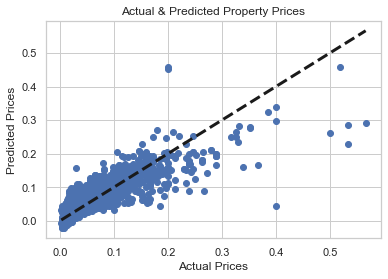

In [ ]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual & Predicted Property Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  
plt.show()

# Part 2

## Importing Libraries for all the different models

In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


### Calculate the median of inm_price, compares each value in inm_price to this median to determine if it's greater, and then converts the boolean outcomes (True for values greater than the median, False otherwise) to integers (1 for True, 0 for False), assigning this to the new price_category column.

#### A binary classification model based on median property prices offers simplicity, balanced classes, practical utility for decision-making, and potentially enhanced performance and interpretability.

In [ ]:


# Assuming 'df' is your DataFrame
median_price = df['inm_price'].median()
df['price_category'] = (df['inm_price'] > median_price).astype(int)

# Select numerical features and drop the target variable and any other feature related to the price 
features = df.select_dtypes(include=[np.number]).drop(columns=['inm_price', 'price_category',  'price_quarterly_interaction'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['price_category'], test_size=0.2, random_state=42)



### Use the model to calculate predictions

In [ ]:
# Define models
models = {
    "Perceptron": Perceptron(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

### Train the model use test and train data sets (splitting)

In [ ]:
acc = []  # Initialize an empty list to store accuracy of each model

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Append a dictionary with the model's name and its accuracy to the list
    acc.append({'model': name, 'accuracy': accuracy, "mse": mse})
    
    mse = mean_squared_error(y_test, predictions)
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} MSE: {mse:.4f}")
    print(classification_report(y_test, predictions))
    print("=" * 50)  # Add a separator for better readability


Perceptron Accuracy: 0.8662
Perceptron MSE: 0.1338
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1596
           1       0.96      0.77      0.85      1596

    accuracy                           0.87      3192
   macro avg       0.88      0.87      0.86      3192
weighted avg       0.88      0.87      0.86      3192

Logistic Regression Accuracy: 0.9107
Logistic Regression MSE: 0.0893
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1596
           1       0.91      0.91      0.91      1596

    accuracy                           0.91      3192
   macro avg       0.91      0.91      0.91      3192
weighted avg       0.91      0.91      0.91      3192

LDA Accuracy: 0.8929
LDA MSE: 0.1071
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1596
           1       0.88      0.91      0.89      1596

    accuracy             

In [ ]:
print(acc)

[{'model': 'Perceptron', 'accuracy': 0.8662280701754386, 'mse': 0.09492481203007519}, {'model': 'Logistic Regression', 'accuracy': 0.9107142857142857, 'mse': 0.1337719298245614}, {'model': 'LDA', 'accuracy': 0.8928571428571429, 'mse': 0.08928571428571429}, {'model': 'QDA', 'accuracy': 0.8696741854636592, 'mse': 0.10714285714285714}, {'model': 'KNN', 'accuracy': 0.9050751879699248, 'mse': 0.13032581453634084}]


### Through this we can see that LDA has the lowest mse and highest accuracy between all the other models

# Part 3 (extra credit)

## For this part i chose two differnt models:
- Random forest
- Support Vector Machine (SVM)

#### I chose random forsest because after my research i saw that, random forest and gradient boosting are chosen for their ability to handle complex data structures and provide high accuracy through ensemble learning, which combines multiple weak learners to form a strong learner. And SVM which is a powerful classifier that finds the hyperplane in an N-dimensional space usinggs N which is the number of features that distinctly classifies the data points. It's effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples.

### Importing libarries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

### Defining your model involves choosing the algorithm Random Forest in this case and setting its parameters. here i decided on the strategy my model will use to learn from the data. The Random Forest algorithm is chosen for its robustness and ability to handle complex datasets with minimal overfitting.

## Random Forst

In [ ]:

# Define the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
rf_predictions = random_forest_model.predict(X_test)

# Calculate the accuracy and Mean Squared Error (MSE)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Classifier MSE: {rf_mse:.4f}")

# You can also print the classification report for more detailed performance analysis
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Accuracy: 0.9417
Random Forest Classifier MSE: 0.0583
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1596
           1       0.94      0.94      0.94      1596

    accuracy                           0.94      3192
   macro avg       0.94      0.94      0.94      3192
weighted avg       0.94      0.94      0.94      3192



### I can see that we got a really good accuracy with a very low mse.
### The data has already been cleaned with the eda and manipulated for the classifcation part of the project. The fact that the precision is high might be due to overfitting but as we can see, that in the exercise above our model has a normal precision. So I could conclude tha the random forest model is a good fit for this classification problem

## SVM

### I also chose svm because it uses muluple folds, by dividing the dataset into k folds in my case, 5, the model is trained and evaluated k times, each time using a different fold as the test set and the remaining data as the training set

In [ ]:

# Define the SVM Classifier with a specific kernel (e.g., 'linear', 'rbf', etc.)
svm_model_cv = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels

# Apply k-fold cross-validation (let's use k=5)
svm_cv_scores = cross_val_score(svm_model_cv, features, df['price_category'], cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold with SVM:")
print(svm_cv_scores)

# Print mean and standard deviation of scores to get an overall idea of the model performance
print(f"\nMean accuracy with SVM: {svm_cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy with SVM: {svm_cv_scores.std():.4f}")


Accuracy scores for each fold with SVM:
[0.91165414 0.90726817 0.91256659 0.91538703 0.9056722 ]

Mean accuracy with SVM: 0.9105
Standard deviation of accuracy with SVM: 0.0036


### This method reduces bias associated with the random splitting of data